In [1]:
import numpy
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cross_validation import train_test_split
numpy.random.seed(10)

In [2]:
all_df = pd.read_csv("data/titanic.csv")

In [3]:
cols=['survived','pclass' ,'sex', 'age',
       'fare',]
df=all_df[cols]
df.isnull().sum()
df=df.values

In [4]:
X = df[:,1:]
Y = df[:,0]
X[:5]

array([[  1.    ,   0.    ,  29.    , 211.3375],
       [  1.    ,   1.    ,   0.9167, 151.55  ],
       [  1.    ,   0.    ,   2.    , 151.55  ],
       [  1.    ,   1.    ,  30.    , 151.55  ],
       [  1.    ,   0.    ,  25.    , 151.55  ]])

In [5]:
 X = StandardScaler().fit_transform(X)
train_Features, test_Features, train_Label, test_Label = train_test_split(X, Y, test_size=0.2, random_state=True) 
len(train_Features)

1046

In [6]:
train_Features[355:359]

array([[ 0.84246649, -1.34419751,  0.8216082 , -0.46039806],
       [ 0.84246649, -1.34419751,  0.09991351, -0.19415727],
       [ 0.84246649,  0.74393829, -0.18876436, -0.49092056],
       [-0.35140802, -1.34419751,  0.17208298, -0.23764487]])

In [7]:
train_Label[:4]

array([1., 0., 0., 0.])

In [8]:
test_Features.shape

(262, 4)

In [9]:
test_Label.shape

(262,)

In [10]:
from keras.models import Sequential
from keras.layers.embeddings import Embedding
from keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPooling2D
from keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=2)

Using TensorFlow backend.


In [11]:
train_Features.shape

(1046, 4)

In [12]:
train_Features = train_Features.reshape(train_Features.shape[0], 4, 1, 1)

In [13]:
train_Features.shape

(1046, 4, 1, 1)

In [14]:
from keras.utils import np_utils
train_Label = train_Label.reshape(train_Label.shape[0], 1)
test_Label= test_Label.reshape(test_Label.shape[0], 1)
train_Label=np_utils.to_categorical(train_Label)
test_Label=np_utils.to_categorical(test_Label)

In [15]:
model = Sequential()

In [16]:
model.add(Conv2D(filters=1000,
                 kernel_size=(1,1),
                 padding='valid',
                 input_shape=(4,1,1), 
                 activation='relu'))

In [17]:
model.add(Conv2D(filters=1000,
                 kernel_size=(1,1),
                 padding='valid',
                 activation='relu'))

In [18]:
model.add(MaxPooling2D(pool_size=(1, 1)))

In [19]:
model.add(Dropout(0.25))

In [20]:
model.add(Flatten())

In [21]:
model.add(Dense(128, activation='tanh'))

In [22]:
model.add(Dropout(0.25))

In [23]:
model.add(Dense(2,activation='sigmoid'))

In [24]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 4, 1, 1000)        2000      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 1, 1000)        1001000   
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 4, 1, 1000)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 4, 1, 1000)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 4000)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               512128    
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
__________

In [25]:
model.compile(loss='categorical_crossentropy', 
              optimizer='adam', metrics=['accuracy'])
model.fit(x=train_Features,y=train_Label)

Epoch 1/1
1046/1046 [==============================] - 8s 7ms/step - loss: 0.5378 - acc: 0.7505


In [26]:
train_history =model.fit(x=train_Features, 
                         y=train_Label, 
                         validation_split=0.2, 
                         epochs=30, 
                         batch_size=30,verbose=2,callbacks=[early_stopping])

Train on 836 samples, validate on 210 samples
Epoch 1/30
 - 5s - loss: 0.4627 - acc: 0.7883 - val_loss: 0.5346 - val_acc: 0.7238
Epoch 2/30
 - 5s - loss: 0.4712 - acc: 0.7871 - val_loss: 0.4954 - val_acc: 0.7714
Epoch 3/30
 - 6s - loss: 0.4708 - acc: 0.7847 - val_loss: 0.5053 - val_acc: 0.7238
Epoch 4/30
 - 6s - loss: 0.4651 - acc: 0.7859 - val_loss: 0.4849 - val_acc: 0.7619
Epoch 5/30
 - 7s - loss: 0.4578 - acc: 0.7823 - val_loss: 0.4905 - val_acc: 0.7667
Epoch 6/30
 - 6s - loss: 0.4748 - acc: 0.7775 - val_loss: 0.4934 - val_acc: 0.7286


In [27]:
import matplotlib.pyplot as plt
def show_train_history(train_history,train,validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

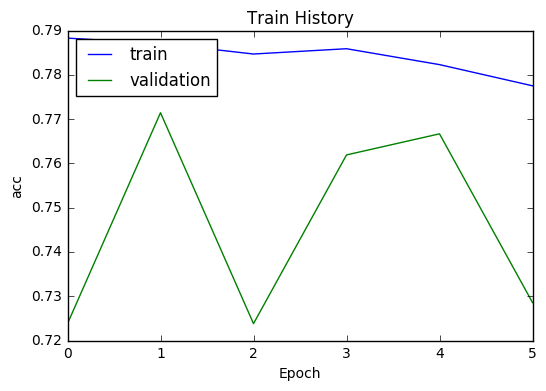

In [28]:
show_train_history(train_history,'acc','val_acc')

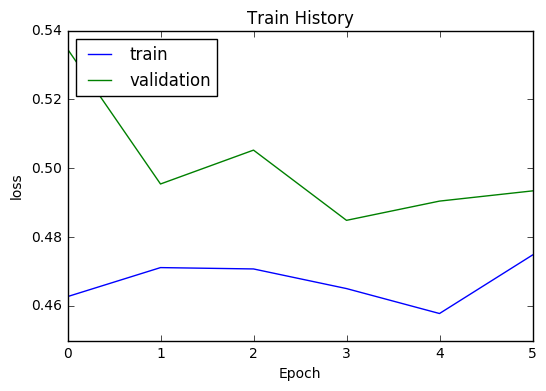

In [29]:
show_train_history(train_history,'loss','val_loss')

In [30]:
test_Features = test_Features.reshape(test_Features.shape[0], 4, 1, 1)

In [31]:
scores = model.evaluate(x=test_Features, 
                        y=test_Label)

262/262 [==============================] - 0s 1ms/step


In [32]:
scores[1]

0.7824427476366058